estávamos trabalhando até então com um único perceptron. A nossa ideia é ampliar essa rede neural e adicionar mais camadas, mais neurônios, e entender como ficaria o resultado fazendo isso.
página NN-SVG para entender como seria o esquema de uma rede neural com mais camadas.
https://alexlenail.me/NN-SVG/index.html



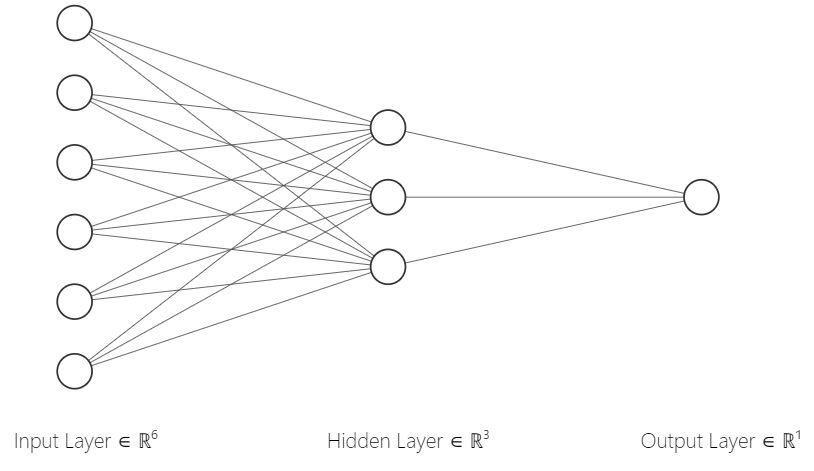

No caso, temos uma ilustração mostrando no canto esquerdo seis círculos. Esses seis círculos são as nossas entradas. Lembrem-se que temos o nosso conjunto de dados com seis variáveis diferentes. Recapitulando, temos a idade, o colesterol, cp1, cp2, cp3 e cp4.

A ideia é colocar uma camada chamada oculta, que vai ficar entre entrada e saída, e vai receber uma quantidade de neurônios. Nesse exemplo, estamos usando três neurônios, e eles sempre vão se conectar com as nossas entradas.

Isso pode ser muito interessante para que a nossa rede neural consiga entender melhor as nossas entradas, entender a relação entre os dados, para trazer uma saída melhor. Depois da camada oculta, temos a saída no final.

Vamos partir para o teste? Vamos criar uma rede neural, que vai ter uma entrada igual a 6, ela vai ter uma camada oculta com 3 neurônios, e ela vai ter uma saída igual a 1.

Só que falta algo. Lembra que, além dos pesos, também temos o viés. Portanto, nessa segunda camada, que é a primeira oculta, vamos adicionar, ao invés de 3, o número 4. Assim, teremos mais um círculo no topo dessa camada.

Do lado esquerdo, no menu de opções, vamos selecionar "Show bias units" que serve para mostrar o viés. Esse círculo a mais é esse viés que temos no modelo.

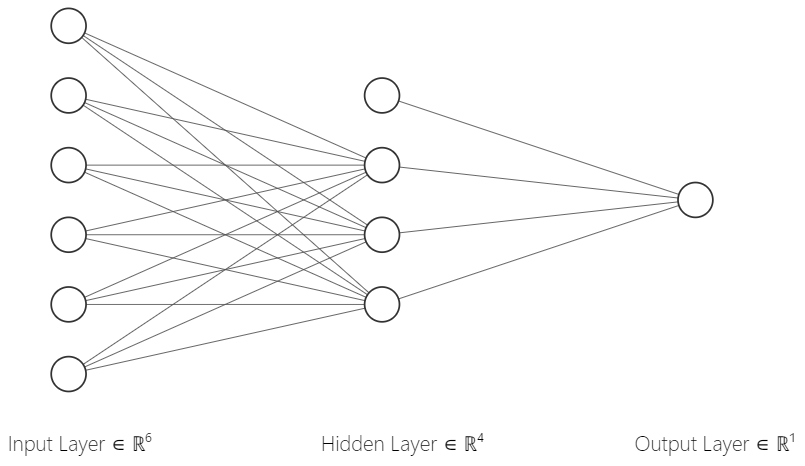



In [10]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

versao_tensorflow = tf.__version__
print(f'Tensorflow instalado na versão: {versao_tensorflow}')

Tensorflow instalado na versão: 2.16.1


In [12]:
%pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
doenca_cardiaca = fetch_ucirepo(id=45)

Note: you may need to restart the kernel to use updated packages.


In [13]:
X = doenca_cardiaca.data.features
X = X[['age', 'chol', 'cp']]

In [14]:
# Criar variáveis dummy para a coluna 'cp'
df_cp = pd.get_dummies(X['cp'], prefix='cp')
X = X.drop('cp', axis=1)
X = X.join(df_cp)

In [15]:
target = doenca_cardiaca.data.targets
target = (target > 0) * 1

In [16]:
entrada = tf.constant(X, dtype=tf.float32)
y = tf.constant(target, dtype=tf.float32)

In [17]:
# Dividindo os dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(
    entrada.numpy(), 
    y.numpy(), 
    test_size=0.2,
    stratify=y.numpy(), 
    random_state=4321
)

In [18]:
# Normalizando os dados
scaler = StandardScaler()
X_treino = scaler.fit_transform(X_treino)
X_teste = scaler.transform(X_teste)

# Convertendo para tensores do TensorFlow
X_treino = tf.constant(X_treino, dtype=tf.float32)
X_teste = tf.constant(X_teste, dtype=tf.float32)
y_treino = tf.constant(y_treino, dtype=tf.float32)
y_teste = tf.constant(y_teste, dtype=tf.float32)


In [19]:
# qual é o tamanho da camada anterior.
# qual será a quantidade de neurônios nessa camada atual,
def obter_pesos_vies(tamanho_camada_anterior, n_neuronios_nessa_camada):
  tf.random.set_seed(31)
  pesos_camada = tf.Variable(tf.random.normal([tamanho_camada_anterior, n_neuronios_nessa_camada]))
  vieses_camada = tf.Variable(tf.random.normal([n_neuronios_nessa_camada]))
  return pesos_camada, vieses_camada



Para compreender a construção de uma rede neural com a inclusão de uma nova camada, podemos recorrer à imagem abaixo, obtida com a página NN-architecture schematics, que apresenta uma representação visual de uma rede neural composta por uma camada de entrada (Input layer), uma camada oculta (Hidden layer) e uma camada de saída (Output layer):

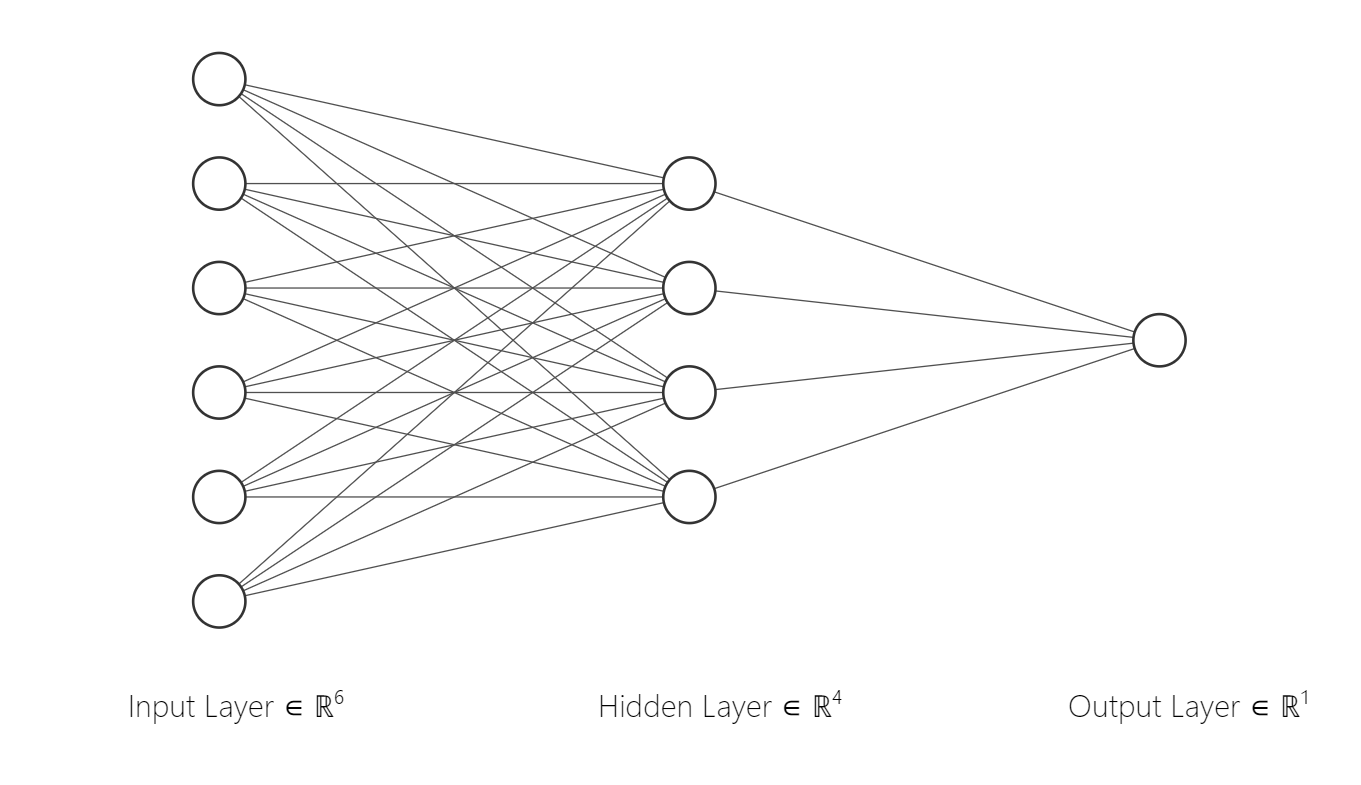

Na imagem apresentada, notamos a presença de uma camada de entrada composta por seis "nós" de entrada, os quais representam as diversas variáveis de entrada que o modelo irá analisar. Por exemplo, cada nó pode estar associado à idade do paciente, ao nível de colesterol e ao tipo de dor no peito, entre outros dados pertinentes.

Enquanto isso, na camada oculta, temos três neurônios que têm um painel de especialistas entre os sintomas e o diagnóstico final. Cada um desses três neurônios pode aprender a identificar diferentes padrões nos dados.

No esquema, o viés é representado como o primeiro círculo na camada oculta, e está conectado a todas as entradas e ao neurônio de saída.

As camadas ocultas são denominadas "ocultas" porque não têm uma conexão direta com o mundo externo (ou seja, não recebem as entradas diretamente, nem produzem as saídas diretamente); ao invés disso, elas operam internamente para processar e transformar as entradas em algo que a camada de saída possa usar.

O modelo finalmente converte as análises complexas realizadas pela camada oculta em um resultado na camada de saída, que é representada por um único neurônio. Por fim, este neurônio de saída pode fornecer a probabilidade de um paciente ter ou não uma doença cardíaca.

Nós podemos imaginar uma rede neural como uma fábrica de processamento de informações. Os dados entram, passam por várias etapas de transformação (as camadas ocultas), e saem na outra ponta como uma resposta ou previsão.

Cada camada é composta por um conjunto de neurônios, que são basicamente funções matemáticas que transformam os dados de uma maneira específica. Ao adicionar mais camadas, estamos basicamente construindo uma fábrica mais complexa, capaz de entender e modelar melhor os dados.



In [20]:
quantidade_features = X_treino.shape[1]
qtd_neuronios_camada_oculta = 3
pesos1, vies1 = obter_pesos_vies(quantidade_features, qtd_neuronios_camada_oculta)
qtd_neuronio_saida = 1
pesos2, vies2, = obter_pesos_vies(qtd_neuronios_camada_oculta, qtd_neuronio_saida)
# desta forma acima, iniciamos a primeira camada com a quantidade quantidade_features, e com a quantidade saidas para qtd_neuronios_camada_oculta
# na segunda camada quantiadade de camadas de entradas é de qtd_neuronios_camada_oculta, e de saida qtd_neuronio_saida

In [21]:
otimizador_treino = tf.optimizers.SGD(learning_rate=0.01)

perdas_3_neuronios = []
taxas_acerto_3_neuronios = []

In [22]:
def neuronio(x, pesos, vies):
  z = tf.add(tf.matmul(x, pesos), vies)
  return z

In [23]:
QUANTIDADE_EPOCAS = 1000
calculadora_perda = tf.keras.losses.BinaryCrossentropy()
for epoca in range(QUANTIDADE_EPOCAS):
    with tf.GradientTape() as tape:
        fim_da_primeira = tf.sigmoid(neuronio(X_treino, pesos1, vies1))
        # veja que a saida da primeira camada (fim_da_primeira), é usada como entrada para a segunda camada
        fim_da_segunda = tf.sigmoid(neuronio(fim_da_primeira, pesos2, vies2))
        # agora vamos calcular a perda usando a suada da segunda camada
        custo = calculadora_perda(y_treino, fim_da_segunda)
    # após treinar, vamos testar o modelo gerado 
    fim_da_primeira_teste = tf.sigmoid(neuronio(X_teste, pesos1, vies1))
    fim_da_segunda_teste = tf.sigmoid(neuronio(fim_da_primeira_teste, pesos2, vies2))
    # agora precisa calcular os acertos
    acertos = np.mean(y_teste.numpy() == ((fim_da_segunda_teste.numpy() > 0.5)*1))

    taxas_acerto_3_neuronios.append(acertos)
    perdas_3_neuronios.append(custo.numpy())

    gradientes = tape.gradient(custo, [pesos1, vies1, pesos2, vies2])
    otimizador_treino.apply_gradients(zip(gradientes, [pesos1, vies1, pesos2, vies2]))